# READ.ME


## Dependencies:
- numpy
- matplotlib
- pandas

# Question 1

In [70]:
import numpy as np
import matplotlib.pyplot as plt


In [71]:
#load data
from google.colab import drive #COMMENT OUT/ CHANGE FILE PATH
drive.mount('/content/drive')

x_train = np.load("/content/drive/MyDrive/Colab_Notebooks/ML/Assingment_1/x_train.npy")
y_train = np.load("/content/drive/MyDrive/Colab_Notebooks/ML/Assingment_1/y_train.npy")

x_test = np.load("/content/drive/MyDrive/Colab_Notebooks/ML/Assingment_1/x_test.npy")
y_test = np.load("/content/drive/MyDrive/Colab_Notebooks/ML/Assingment_1/y_test.npy")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


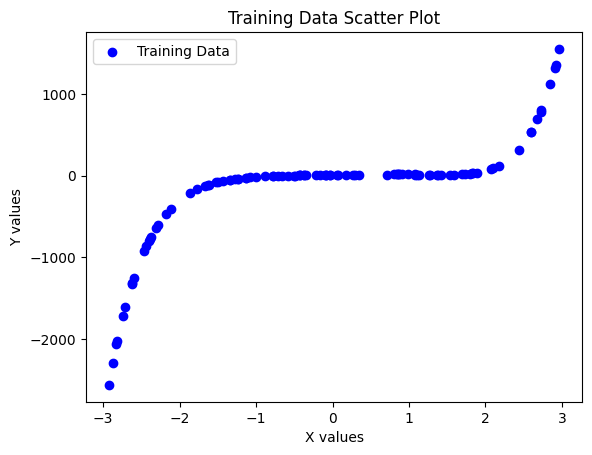

In [73]:
#visuals for givenm data
plt.scatter(x_train, y_train, color='blue', label="Training Data")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Training Data Scatter Plot")
plt.legend()
plt.show()


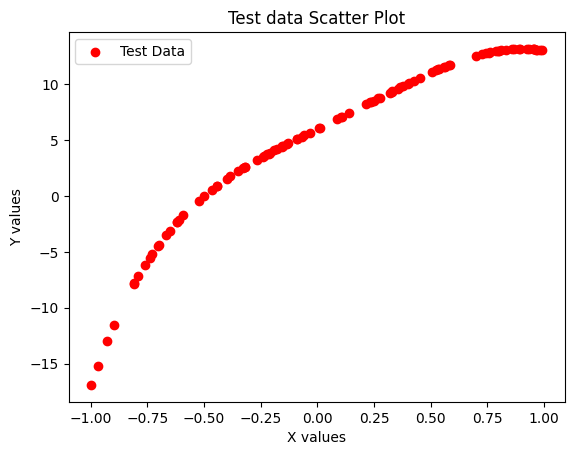

In [74]:
plt.scatter(x_test, y_test, color='red', label="Test Data")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Test data Scatter Plot")
plt.legend()
plt.show()

Train MSE:693143.46
Test MSE:37658.12


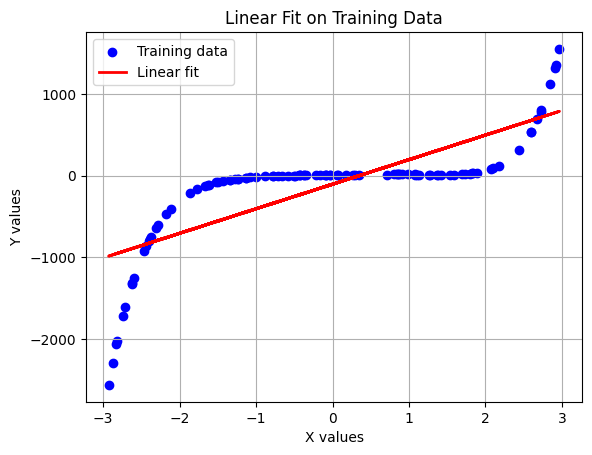

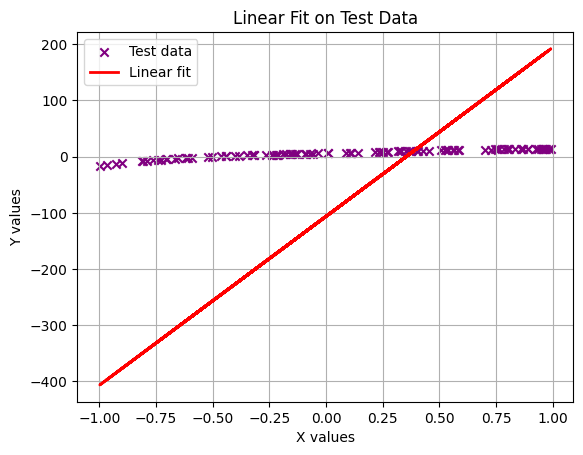

In [75]:
class LinearRegression:
    def __init__(self):
        self.theta = None  #parameters

    def fit(self, x, y):
        #so this computes the optimal theta using the normal equation
        x = x.reshape(-1, 1)  #reshape x ensure column vector
        y = y.reshape(-1, 1)  #reshape y

        X = np.c_[np.ones(x.shape[0]), x]  #column of ones for the intercept
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))  #solve for theta norm equation

    def predict(self, x):
        #make predictions based on the trained
        x = x.reshape(-1, 1)  #ensure x is reshaped column vector
        X = np.c_[np.ones(x.shape[0]), x]  #add bias column of 1 to match training
        return np.dot(X, self.theta)  # matrix multiplication to generate predictions

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2) #calculatesaverage squared difference between true and the predicted values

#train model
model = LinearRegression()  #create instance of linear regression
model.fit(x_train, y_train)  #train model using training data

#make prediction
y_train_pred = model.predict(x_train) #predict y values for training data
y_test_pred = model.predict(x_test) #predict y value for test data

#error mse
mse_train = model.mean_squared_error(y_train, y_train_pred) #calculate training mse
mse_test = model.mean_squared_error(y_test, y_test_pred) #calculate test mse

print(f"Train MSE:{mse_train:.2f}")  #print the training mse to check performance 2 decimals
print(f"Test MSE:{mse_test:.2f}")  #print the test mse to evaluate generalization 2 deciamls

#plot da training
plt.figure()
plt.scatter(x_train, y_train, label="Training data", color="blue", marker="o")
plt.plot(x_train, y_train_pred, label="Linear fit", color="red", linewidth=2)
plt.title("Linear Fit on Training Data")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()

#plot da test
plt.figure()
plt.scatter(x_test, y_test, label="Test data", color="purple", marker="x")
plt.plot(x_test, y_test_pred, label="Linear fit", color="red", linewidth=2)
plt.title("Linear Fit on Test Data")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()


Degree = 2: Train MSE = 716618.19, Test MSE = 31422.72
Degree = 3: Train MSE = 847649.00, Test MSE = 6750.47
Degree = 4: Train MSE = 849905.66, Test MSE = 6855.92
Degree = 5: Train MSE = 865581.60, Test MSE = 648.29
Degree = 6: Train MSE = 865582.02, Test MSE = 649.71
Degree = 7: Train MSE = 865966.07, Test MSE = 101.98
Degree = 8: Train MSE = 865966.07, Test MSE = 101.98

best polynomial degree = 7


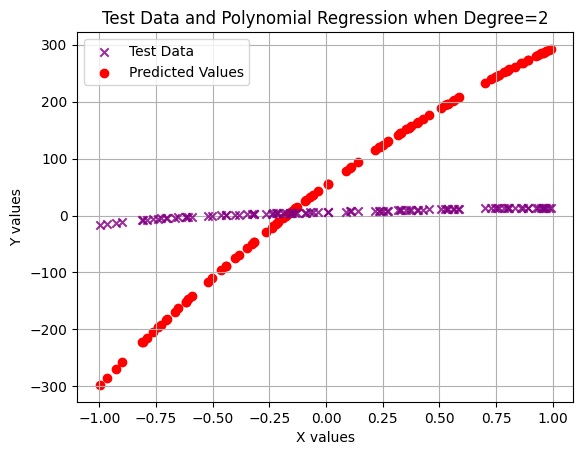

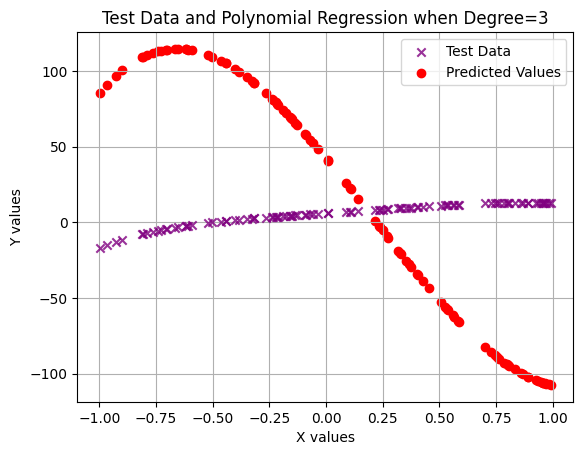

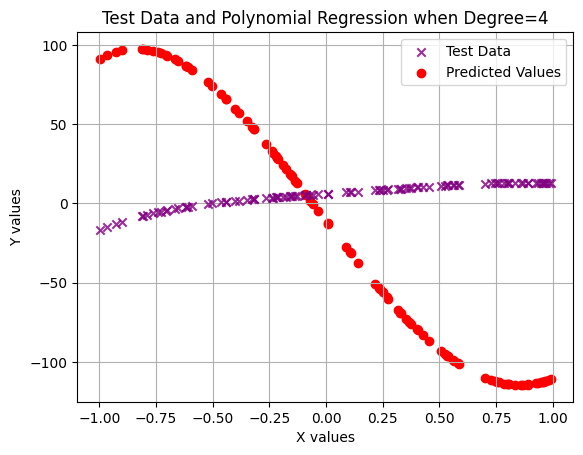

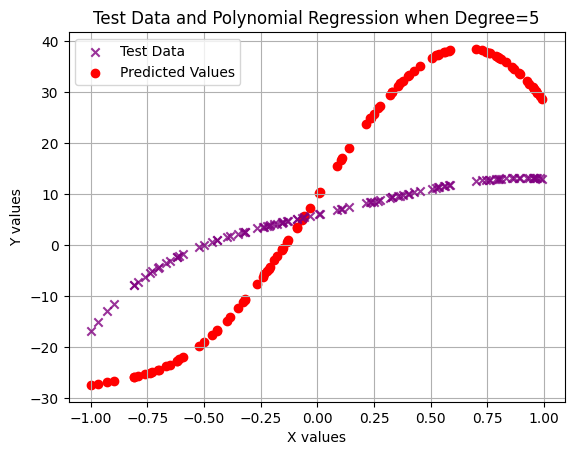

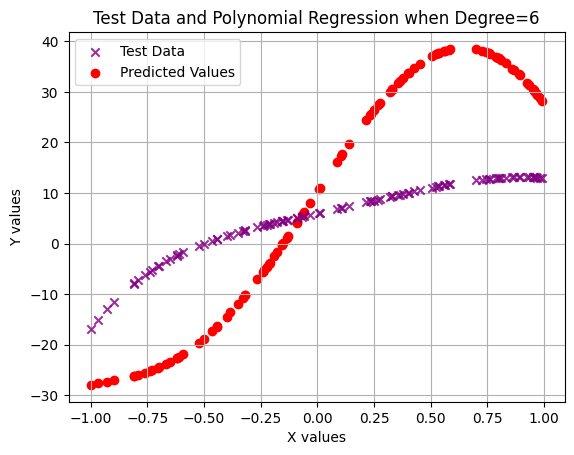

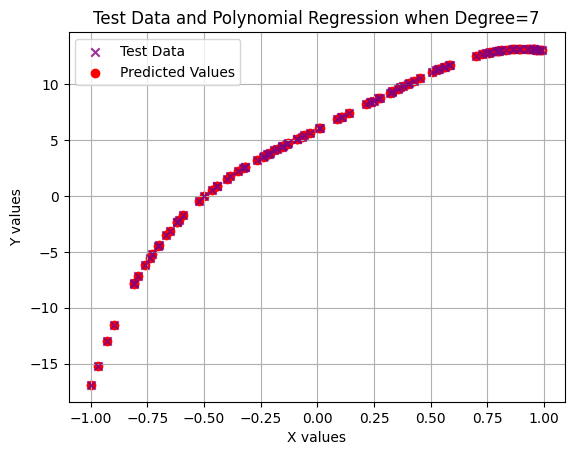

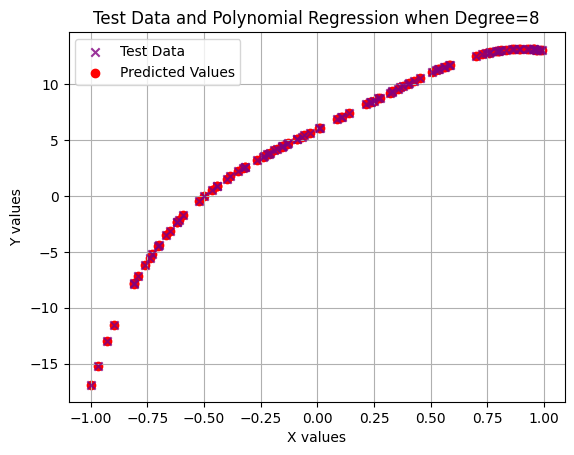

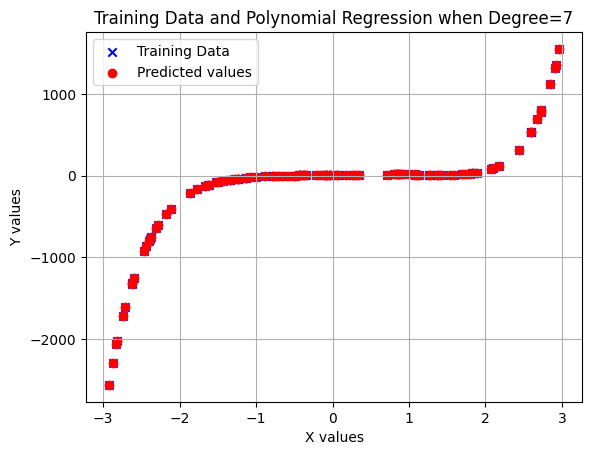

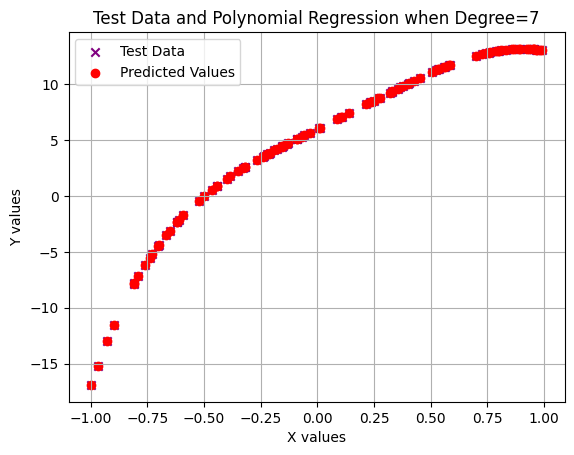

In [88]:
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree  #store degree
        self.theta = None  #parameters

    def _expand_features(self, x):
        #this expand the input x into polynomial features up to degree gpt helped me here
        x = x.reshape(-1, 1) #ensure x is reshaped as a column vector
        X_poly = np.c_[np.ones(x.shape[0]), x] #add bias term (column of ones)
        for i in range(2, self.degree + 1):
            X_poly = np.c_[X_poly, x**i] #append higher degree terms
        return X_poly

    def fit(self, x, y):
        #compute the optimal theta using the normal equation
        X_poly = self._expand_features(x) #expand x into polynomial features
        y = y.reshape(-1, 1)  #ensure y reshaped into column vector

        self.theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T.dot(y)) #solve theta using normal equation

    def predict(self, x):
        #make predictions based on the trained model
        X_poly = self._expand_features(x)  #expand x into polynomial dimensions
        return np.dot(X_poly, self.theta) #perform matrix multiplication for predictions

    def mean_squared_error(self, y_true, y_pred):
        #compute the mean squared error (mse) to evaluate model performance
        return np.mean((y_true - y_pred) ** 2) #did before

#try different polynomial degrees and choose the best one
degrees = [2, 3, 4, 5, 6, 7, 8] #list of degrees to test
train_mses = [] #store training mse values
test_mses = []  #store test mse values

for d in degrees:
    model = PolynomialRegression(degree=d)  #create a polynomial regression model with degree d
    model.fit(x_train, y_train) #train the model with training data

    y_train_pred = model.predict(x_train)  #predict y values for training data
    y_test_pred = model.predict(x_test) #predict y values for test data
    mse_train = model.mean_squared_error(y_train, y_train_pred) #calculate training mse
    mse_test = model.mean_squared_error(y_test, y_test_pred)  #calculate test mse
    train_mses.append(mse_train) #storing training mse
    test_mses.append(mse_test)  #storeing test mse

    print(f"Degree = {d}: Train MSE = {mse_train:.2f}, Test MSE = {mse_test:.2f}") #print mse values for comparison gpt helped here

#select the best polynomial degree lowest non-zero test mse-  gpt helped here
test_mses_array = np.array(test_mses) #convert test mses to a numpy array
valid_mses = test_mses_array[test_mses_array > 1e-6]  #remove near-zero values to avoid overfitting

best_degree_index = np.where(test_mses_array == np.min(valid_mses))[0][0]  #find index of best mse
best_degree = degrees[best_degree_index]  #select the best degree (lowest mse but not 0)

print(f"\nbest polynomial degree = {best_degree}")  #print the chosen degree

#train the final model with the best degree
final_model = PolynomialRegression(degree=best_degree)  #create model with best degree
final_model.fit(x_train, y_train) #train the model

for degree in degrees: # for loop to show all degreesa
    model = PolynomialRegression(degree=degree)  #instance of polynomial model for every degree
    model.fit(x_train, y_train) #train
    y_test_pred = model.predict(x_test) #predict y values for testing

    plt.figure()
    plt.scatter(x_test, y_test, label="Test Data", color="purple", marker="x", alpha=0.8, zorder=2)
    plt.scatter(x_test, y_test_pred, label="Predicted Values", color="red", zorder=1)
    plt.title(f'Test Data and Polynomial Regression when Degree={degree}')
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.grid(True)
    plt.show()

#plot training data / predictions for best
y_train_pred = final_model.predict(x_train)
plt.figure()
plt.scatter(x_train, y_train, label="Training Data", color="blue", marker="x")
plt.scatter(x_train, y_train_pred, label="Predicted values", color="red")
plt.title(f'Training Data and Polynomial Regression when Degree={best_degree}')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()

#plot test data / predictions for best
y_test_pred = final_model.predict(x_test)
plt.figure()
plt.scatter(x_test, y_test, label="Test Data", color="purple", marker="x")
plt.scatter(x_test, y_test_pred, label="Predicted Values", color="red")
plt.title(f'Test Data and Polynomial Regression when Degree={best_degree}')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()


# Question 1 Report

## Thought Process for code
### For linear:
- First, I wanted to see if a linear model would work for this dataset, but I had a feeling that the assignment was meant to introduce us to polynomial regression. To start, I plotted the training and test data, and it was clear just from looking at the graphs that Linear Regression wouldn't be enough to model the relationship between x and y. The data had a curve, and a straight line model wouldn't be able to capture it properly.

  I implemented linear regression with numpy for calculations and matplotlib for visualization. Since the dataset was already in npy format I used numpy laod to load the training and test data. I then created a class structure for the linear regression model to keep things organized.

  To train the model I had to reshape x and y to ensure they were in the correct column vector format for matrix calculations. I also added a bias which is a column of ones, so the model could learn the intercept. Instead of using gradient descent, I used the Normal Equation to calculate the best parameters directly since the dataset is small, making this method more efficient.

  For making predictions I reshaped x again to ensure it was in the correct format and added the bias again and then used matrix multiplication to compute the predictions. This means the model takes the input values and multiplies them by the parameters, and gives the predictionms. I also wrote a function to calculate mean squared error which measures how far the predictions were from the actual values. The higher the MSE usaully the worse the model performs.

  Once the model was trained, I made predictions on both the training and test data and calculated the MSE for both. When I printed the values, they were high which confirmed that linear regression was not a good fit.

  I plotted the training data with its predictions and did the same for the test. The line representing for the predictions did not align with the data points which confirmed that a line model couldnt capture the trend in the data.

  Since linear regression didnt work well the next step is to try polynomials.

### For Polynomial:
- I modified the linear regression model by adding a function that transforms x into polynomial features. Instead of just using x the model now includes x raised to different powers depending on the polynomial degree. For example, if degree 3, the model learns from x, x^2, x^3.

  similar to the linear model. The training process first reshaped x and added a column of 1's as a bias term, and then expanded x into polynomial features. I used the normal equation again, but this time with the polynomial features.

  For predictions I had to make sure that any new input was also transformed into polynomial before multiplying it,ensuring predictions were the same format as the training.

  I tested multiple degrees to find the best one. A low degree was too simple and didnt fit well, while a higher copyed the training  too much so overfit. I trained models for degrees 2-8

  I found that degree 7 was the best because it had the lowest error without overfitting too mcuh. Degree 7 and 8 had very low MSE so they might be prone to overfittin, so Degree 5 could be usable also for the model.

  I plotted the test data and the predictions for every degree.

  in conclusion, polynomial regression with degree 7 was the best model for this dataset. It may not generalize well enough.

## Is the relationship linear?
- No, the training and test data are non-linear.  
- The linear regression model performed poorly at gemeralizing and fitting as seen in high MSE values and graph:
  - Train MSE: 172822.60
  - Test MSE: 35281.34
- The red linear line doesnt fit well with the actual data.

## Do you need feature engineering to add non-linearity? If so, how can you engineer these features?
- Yes, since the relationship isn't linear, we need to use polynomials features of varying degrees.

## What are some functions that you can try?
-  Trying polynomial regression now with degrees 2-8.
- The best polynomial degree was determined by comparing the test MSE's.

## How did you verify the best function?
Comparison of test MSE values from plots shown above:
- Degree = 2: Train MSE = 716618.19, Test MSE = 31422.72
- Degree = 3: Train MSE = 847649.00, Test MSE = 6750.47
- Degree = 4: Train MSE = 849905.66, Test MSE = 6855.92
- Degree = 5: Train MSE = 865581.60, Test MSE = 648.29
- Degree = 6: Train MSE = 865582.02, Test MSE = 649.71
- Degree = 7: Train MSE = 865966.07, Test MSE = 101.98
- Degree = 8: Train MSE = 865966.07, Test MSE = 101.98

So, best polynomial degree = 7

- **So why Degree 7?**
  - It has the lowest non-zero test MSE.
  - there is the chance of degree 7 overfitting, but for now it is non-zero MSE and the lowest MSE.

## Final Conclusion
- Linear regression is not suitable for this data.
- Polynomial regression degree 7 is the best choice for data.
- The train and test plots confirm that the polynomial model fits well enough.


# Question 2

In [96]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive') #COMMENT OUT/ CHANGE FILE PATH

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
df = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/ML/Assingment_1/Housing_data_regression.xlsx") #COMMENT OUT/ CHANGE FILE PATH

In [115]:
# display dataset info
print(df.head())#show first few rows
print(df.describe())#show summary statistics
print(df.columns)#show column names

   House ID  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
0         1        1.0      3.472        0.998        1.0        7   
1         2        1.0      3.531        1.500        2.0        7   
2         3        1.0      2.275        1.175        1.0        6   
3         4        1.0      4.050        1.232        1.0        6   
4         5        1.0      4.455        1.121        1.0        6   

   # Bedrooms  Age of home     Price  
0           4           42  491760.0  
1           4           62  502080.0  
2           3           40  454290.0  
3           3           54  455730.0  
4           3           42  505970.0  
       House ID  Bathrooms  Land Area  Living area  # Garages    # Rooms  \
count  20.00000  20.000000  20.000000    20.000000  20.000000  20.000000   
mean   10.50000   1.225000   6.264565     1.479850   1.200000   6.600000   
std     5.91608   0.472257   2.594524     0.632519   0.676679   1.231174   
min     1.00000   1.000000   2.275000    

In [116]:
class LinearRegression: #didnt want to change question 1 with any quirks  so redid LR here
    def __init__(self):
        self.theta = None

    def fit(self, x, y):
        if x.ndim == 1:  # ensure x is always 2D
            x = x.reshape(-1, 1)

        X = np.c_[np.ones(x.shape[0]), x]

        if y.ndim == 1:  # ensure y is always a column vector
            y = y.reshape(-1, 1)

        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

    def predict(self, x):
        if x.ndim == 1:
            x = x.reshape(-1, 1)

        X = np.c_[np.ones(x.shape[0]), x]
        return np.dot(X, self.theta)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)


   Bathrooms  Land Area  Living area  # Garages  # Rooms  # Bedrooms  \
0        1.0      3.472        0.998        1.0        7           4   
1        1.0      3.531        1.500        2.0        7           4   
2        1.0      2.275        1.175        1.0        6           3   
3        1.0      4.050        1.232        1.0        6           3   
4        1.0      4.455        1.121        1.0        6           3   

   Age of home     Price  
0           42  491760.0  
1           62  502080.0  
2           40  454290.0  
3           54  455730.0  
4           42  505970.0  
Train MSE: 249545711036.53
Test MSE: 36845682183.13


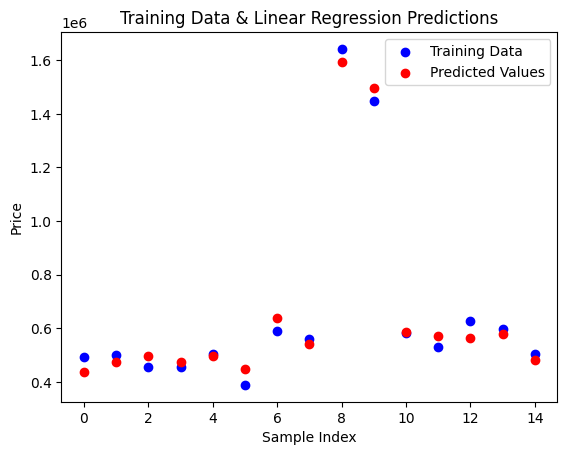

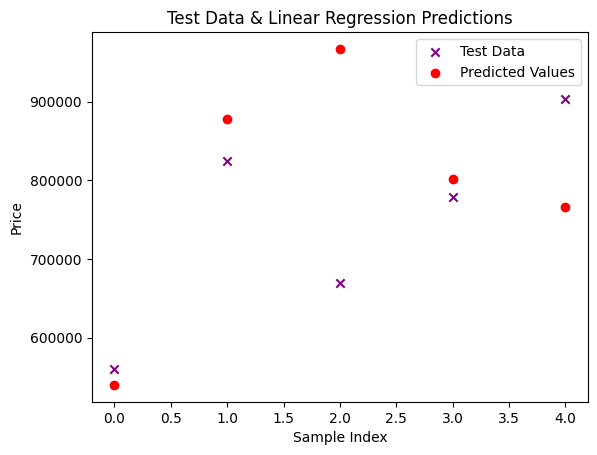


Learned Parameters (Theta Values):
Intercept: -272235.39
Bathrooms: 406470.40
Land Area: 4791.42
Living area: 93688.22
# Garages: 43383.63
# Rooms: 146525.94
# Bedrooms: -192161.73
Age of home: -2599.21

The most impactful feature is: Bathrooms
The least impactful feature is: Age of home


In [119]:
if 'House ID' in df.columns: # so can run again
    df.drop(['House ID'], axis=1, inplace=True)

print(df.head())  #check clean

#split data into features x and target y
target_column = 'Price'
X_feats = df.drop(target_column, axis=1)
y = df[target_column].values

#features to numpy
X_feats_np = X_feats.to_numpy()

#manually split into training and testing sets with last 5 rows testing
x_train = X_feats_np[:-5]
x_test = X_feats_np[-5:]
y_train = y[:-5]
y_test = y[-5:]

# train the model using the predefined LinearRegression class
model = LinearRegression()
model.fit(x_train, y_train)

#predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#MSE
mse_train = model.mean_squared_error(y_train, y_train_pred)
mse_test = model.mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

#plot training
plt.figure()
plt.scatter(range(len(y_train)), y_train, label="Training Data", color="blue", marker="o")
plt.scatter(range(len(y_train)), y_train_pred, label="Predicted Values", color="red")
plt.title("Training Data & Linear Regression Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()

#plot test data / predictions
plt.figure()
plt.scatter(range(len(y_test)), y_test, label="Test Data", color="purple", marker="x")
plt.scatter(range(len(y_test)), y_test_pred, label="Predicted Values", color="red")
plt.title("Test Data & Linear Regression Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()

#show learned parameters
print("\nLearned Parameters (Theta Values):")
for feature, theta in zip(['Intercept'] + list(X_feats.columns), model.theta.flatten()):
    print(f'{feature}: {theta:.2f}')

#get the most and least impactful features
coefficients = np.abs(model.theta[1:])
most_impactful_feature = X_feats.columns[np.argmax(coefficients)]
least_impactful_feature = X_feats.columns[np.argmin(coefficients)]

print(f'\nmost impactful:{most_impactful_feature}')
print(f'least impactful:{least_impactful_feature}')


New Train MSE Age of home): 249161628531.18
New Test MSE Age of home): 32758169087.52


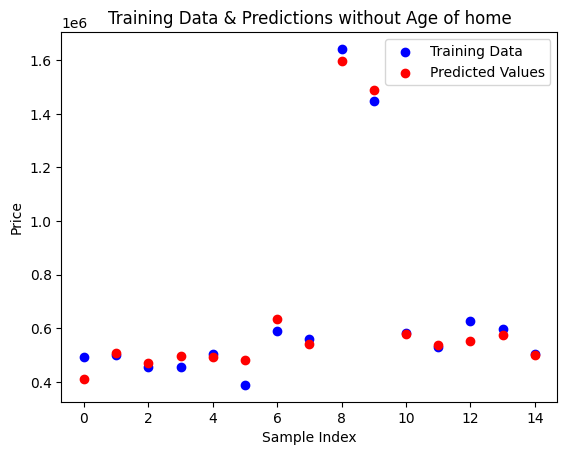

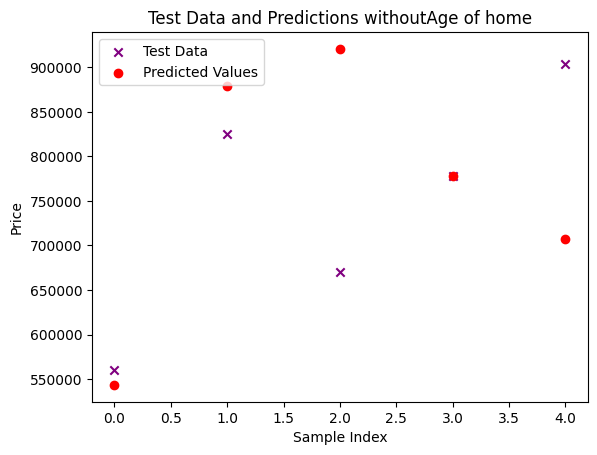

In [125]:
# least_impactful feature
least_impactful_feature = "Age of home"

#check if the column exists before dropping so canm run again
if least_impactful_feature in df.columns:
    df.drop(columns=[least_impactful_feature], inplace=True)
else:
    print(f"Warning: Column '{least_impactful_feature}' not found in dataframe.")


target_column = "Price"
X_feats = df.drop(target_column, axis=1)
y = df[target_column].values


X_feats_np = X_feats.to_numpy()

x_train = X_feats_np[:-5]                              #boilerplate Linear reg
x_test = X_feats_np[-5:]
y_train = y[:-5]
y_test = y[-5:]

model = LinearRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mse_train_new = model.mean_squared_error(y_train, y_train_pred)
mse_test_new = model.mean_squared_error(y_test, y_test_pred)

print(f"New Train MSE{least_impactful_feature}): {mse_train_new:.2f}")
print(f"New Test MSE{least_impactful_feature}): {mse_test_new:.2f}")

# Plot new training predicts
plt.figure()
plt.scatter(range(len(y_train)), y_train, label="Training Data", color="blue", marker="o")
plt.scatter(range(len(y_train)), y_train_pred, label="Predicted Values", color="red")
plt.title(f"Training Data and Predictions without {least_impactful_feature}")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot new test predicts
plt.figure()
plt.scatter(range(len(y_test)), y_test, label="Test Data", color="purple", marker="x")
plt.scatter(range(len(y_test)), y_test_pred, label="Predicted Values", color="red")
plt.title(f"Test Data and Predictions without{least_impactful_feature}")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()

# Question 2 Report

## Thought Process
I used linear regression from before, with some adjustment to make sure x is 2d vector and y is column vector, to predict house prices using multiple features like the land area, living area, number of garages, rooms, bedrooms, and the age of the home. First, cleaned the dataset by removing unnecessary columns like the house ID. Then, split the data into training and testing sets to evaluate how well the model performs.

I used a multiple linear regression model and solved for the best parameters using the normal equation again. The model was trained on the available data, and predictions were made for both the training and test sets. I calculated mean squared error to check how well the predictions matched the actual house prices.

## Results

**1. What is the average least squares error for the given data using your simple linear regression model?**
The average least squares error for me is:  
- Training MSE: 2.49 billion  
- Testing MSE: 3.68 billion  

---

**2. Which factor has the most effect on the final value? How do you know this? Can you use only this feature to predict the price?**

The factor with the most effect on the final value is suprisingly **the number of bathrooms**, with a coefficient of 406,470.  
I determined this by looking at the learned parameters, wher it had the highest absolute value coefficient.  

Even though bathrooms have the most influence, using only this would maybe result in a worser model because house prices depend on multiple factors. Removing all the other parameters would cause the model to lose important information and context, which would definielty make the accruacy worse.

---

**3. Which factor has the least effect on the final value? How do you know this? What effect does removing this feature have on the performance?**  

The factor with the least effect on price is **the age of the home**,which does make sense, with a coefficient of -2,599. I found this by looking at the learned parameters again where it had the smallest value. Since the impact was small I tested to see what would happen if I removed it above. After removing Age of home I retrained the model and the training MSE stayed the same at around 2.49 billion,but the test MSE got slightly better at 3.28 billion instead of the before 3.68 billion. This means that age of the home was not very impactful for predicting and removing had little effect.

